<a href="https://colab.research.google.com/github/isaramadunika/Advanced_Statistics_Project/blob/main/Advanced_Statistics_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data cleaning

In [2]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/ASDS/Dialog_2009_2023_Daily.csv')

In [4]:
# Display the first few rows to understand the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
        Date  Price  Open  High   Low     Vol. Change %
0   7/8/2009   5.25  5.25  5.25  5.00  714.20K    0.00%
1   7/9/2009   5.25  5.25  5.25  5.00  386.70K    0.00%
2  7/13/2009   5.25  5.25  5.25  5.00  290.90K    0.00%
3  7/14/2009   5.25  5.25  5.25  5.25  163.60K    0.00%
4  7/15/2009   5.25  5.25  5.25  5.00   63.10K    0.00%


In [5]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3268 non-null   object 
 1   Price     3268 non-null   float64
 2   Open      3268 non-null   float64
 3   High      3268 non-null   float64
 4   Low       3268 non-null   float64
 5   Vol.      3268 non-null   object 
 6   Change %  3268 non-null   object 
dtypes: float64(4), object(3)
memory usage: 178.8+ KB
None


In [6]:
# Basic statistics
print(df.describe())

             Price         Open         High          Low
count  3268.000000  3268.000000  3268.000000  3268.000000
mean     10.279051    10.295563    10.406028    10.160863
std       2.022234     2.019479     2.017998     2.021925
min       5.000000     5.200000     5.250000     5.000000
25%       8.900000     8.900000     9.000000     8.700000
50%      10.600000    10.600000    10.700000    10.500000
75%      11.600000    11.700000    11.800000    11.500000
max      14.800000    14.700000    14.800000    14.500000


In [8]:
# Check if we need to convert any columns
# Convert Date to datetime if it's not already
if 'Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])
    print("Date column converted to datetime")

In [9]:
# Check if Volume column needs cleaning (it might have 'K' or 'M' suffixes)
if 'Vol.' in df.columns:
    # Rename to 'Volume' for clarity
    df = df.rename(columns={'Vol.': 'Volume'})

    # Convert Volume to numeric if it's not already
    if not pd.api.types.is_numeric_dtype(df['Volume']):
        # Function to convert volume strings to numeric
        def convert_volume(vol_str):
            if isinstance(vol_str, str):
                if 'K' in vol_str:
                    return float(vol_str.replace('K', '')) * 1000
                elif 'M' in vol_str:
                    return float(vol_str.replace('M', '')) * 1000000
                else:
                    return float(vol_str)
            return vol_str

        df['Volume'] = df['Volume'].apply(convert_volume)
        print("\
Volume column cleaned and converted to numeric")

Volume column cleaned and converted to numeric


In [10]:
# Convert Change % to numeric if needed
if 'Change %' in df.columns:
    # Rename to 'Change_pct' for easier handling
    df = df.rename(columns={'Change %': 'Change_pct'})

    # Convert to numeric if it's not already
    if not pd.api.types.is_numeric_dtype(df['Change_pct']):
        df['Change_pct'] = df['Change_pct'].str.replace('%', '').astype(float) / 100
        print("\
Change_pct column cleaned and converted to numeric")

print("\
Updated dataset head:")
print(df.head())

Change_pct column cleaned and converted to numeric
Updated dataset head:
        Date  Price  Open  High   Low    Volume  Change_pct
0 2009-07-08   5.25  5.25  5.25  5.00  714200.0         0.0
1 2009-07-09   5.25  5.25  5.25  5.00  386700.0         0.0
2 2009-07-13   5.25  5.25  5.25  5.00  290900.0         0.0
3 2009-07-14   5.25  5.25  5.25  5.25  163600.0         0.0
4 2009-07-15   5.25  5.25  5.25  5.00   63100.0         0.0


## Hypothisis testing and Visulaisation

In [11]:
# Set a matched color palette using Gestalt principles for visual consistency
colors = {'background': '#f7f7f7', 'line': '#2a9d8f', 'highlight': '#e76f51', 'text': '#264653'}

In [13]:
# ---- Hypothesis Testing Methodology ----
# We will perform multiple hypothesis tests:
# 1. One-sample t-test: Is the mean price different from $10?
# 2. Paired t-test: Is there a difference between Open and Close prices?
# 3. Mann-Whitney U test: Compare prices before and after a specific date

print('\
--- Hypothesis Test 1: One-Sample t-test ---')
print('Null Hypothesis (H0): The mean Price is equal to LKR 10')
print('Alternative Hypothesis (Ha): The mean Price is not equal to LKR 10')

--- Hypothesis Test 1: One-Sample t-test ---
Null Hypothesis (H0): The mean Price is equal to LKR 10
Alternative Hypothesis (Ha): The mean Price is not equal to LKR 10


In [15]:
mu0 = 10
prices = df['Price'].dropna()

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(prices, mu0)

In [16]:
# Calculate the 95% confidence interval for the mean
n = len(prices)
mean_price = np.mean(prices)
std_err = stats.sem(prices)
confidence_interval = stats.t.interval(0.95, n-1, loc=mean_price, scale=std_err)

In [17]:
# Output test results
print('\
Test Statistic: {:.4f}'.format(t_stat))
print('P-value: {:.4f}'.format(p_value))
print('95% Confidence Interval for the mean: ({:.4f}, {:.4f})'.format(confidence_interval[0], confidence_interval[1]))

Test Statistic: 7.8885
P-value: 0.0000
95% Confidence Interval for the mean: (10.2097, 10.3484)


In [18]:
if p_value < 0.05:
    print('\
Conclusion: Reject the null hypothesis (H0). The mean Price is significantly different from $' + str(mu0))
else:
    print('\
Conclusion: Fail to reject the null hypothesis (H0). There is not enough evidence that the mean Price is different from $' + str(mu0))


Conclusion: Reject the null hypothesis (H0). The mean Price is significantly different from $10


In [19]:

# ---- Hypothesis Test 2: Paired t-test ----
print('\
\
--- Hypothesis Test 2: Paired t-test ---')
print('Null Hypothesis (H0): There is no difference between Open and Close (Price) prices')
print('Alternative Hypothesis (Ha): There is a significant difference between Open and Close prices')


--- Hypothesis Test 2: Paired t-test ---
Null Hypothesis (H0): There is no difference between Open and Close (Price) prices
Alternative Hypothesis (Ha): There is a significant difference between Open and Close prices


In [21]:
# Perform a paired t-test
t_stat_paired, p_value_paired = stats.ttest_rel(df['Open'], df['Price'])

# Calculate the mean difference and its 95% confidence interval
diff = df['Open'] - df['Price']
mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)
confidence_interval_diff = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)


In [22]:
# Output test results
print('\
Test Statistic: {:.4f}'.format(t_stat_paired))
print('P-value: {:.4f}'.format(p_value_paired))
print('Mean difference (Open - Close): {:.4f}'.format(mean_diff))
print('95% Confidence Interval for the mean difference: ({:.4f}, {:.4f})'.format(confidence_interval_diff[0], confidence_interval_diff[1]))


Test Statistic: 5.1414
P-value: 0.0000
Mean difference (Open - Close): 0.0165
95% Confidence Interval for the mean difference: (0.0102, 0.0228)


In [23]:
if p_value_paired < 0.05:
    print('\
Conclusion: Reject the null hypothesis (H0). There is a significant difference between Open and Close prices')
else:
    print('\
Conclusion: Fail to reject the null hypothesis (H0). There is not enough evidence of a difference between Open and Close prices')


Conclusion: Reject the null hypothesis (H0). There is a significant difference between Open and Close prices


In [25]:
# ---- Hypothesis Test 3: Mann-Whitney U test ----
# Split the data into two periods (before and after 2016)
split_date = pd.Timestamp('2016-01-01')
prices_before = df[df['Date'] < split_date]['Price']
prices_after = df[df['Date'] >= split_date]['Price']

print('\
\
--- Hypothesis Test 3: Mann-Whitney U test ---')
print('Null Hypothesis (H0): The distribution of prices before and after ' + str(split_date.date()) + ' is the same')
print('Alternative Hypothesis (Ha): The distribution of prices before and after ' + str(split_date.date()) + ' is different')



--- Hypothesis Test 3: Mann-Whitney U test ---
Null Hypothesis (H0): The distribution of prices before and after 2016-01-01 is the same
Alternative Hypothesis (Ha): The distribution of prices before and after 2016-01-01 is different


In [26]:
# Perform Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(prices_before, prices_after, alternative='two-sided')

# Output test results
print('\
Test Statistic (U): {:.4f}'.format(u_stat))
print('P-value: {:.4f}'.format(p_value_mw))
print('Median price before ' + str(split_date.date()) + ': {:.4f}'.format(prices_before.median()))
print('Median price after ' + str(split_date.date()) + ': {:.4f}'.format(prices_after.median()))


Test Statistic (U): 604023.5000
P-value: 0.0000
Median price before 2016-01-01: 9.0000
Median price after 2016-01-01: 11.2000


In [27]:
if p_value_mw < 0.05:
    print('\
Conclusion: Reject the null hypothesis (H0). There is a significant difference in price distributions before and after ' + str(split_date.date()))
else:
    print('\
Conclusion: Fail to reject the null hypothesis (H0). There is not enough evidence of a difference in price distributions')

Conclusion: Reject the null hypothesis (H0). There is a significant difference in price distributions before and after 2016-01-01


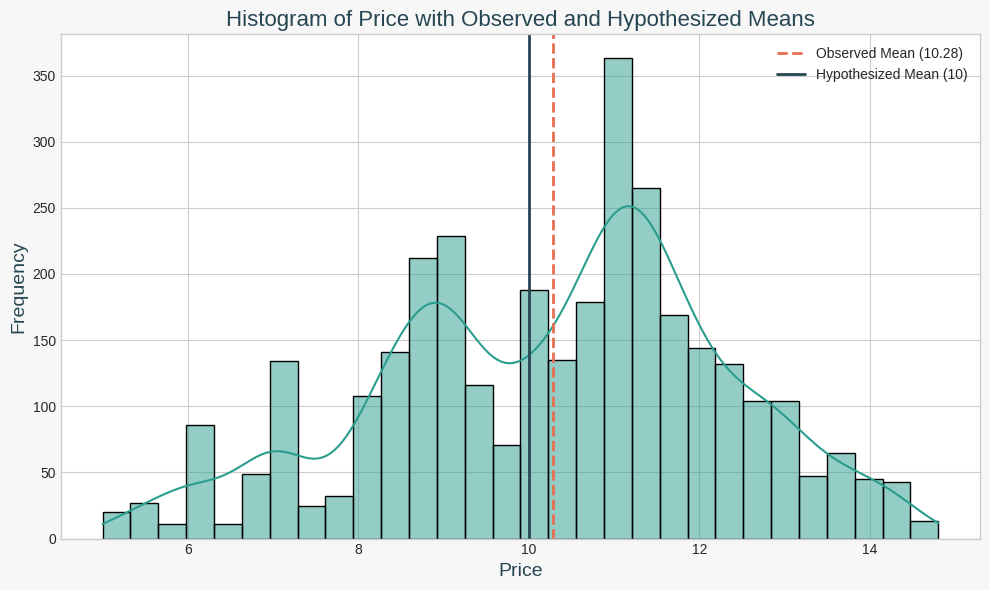

In [33]:
# ---- Graphical Analysis using Gestalt principles ----
# 1. Histogram for One-Sample t-test
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,6), facecolor=colors['background'])

# Histogram
sns.histplot(prices, bins=30, color=colors['line'], kde=True)
# Add vertical lines for the observed mean and the hypothesized mean
plt.axvline(mean_price, color=colors['highlight'], linestyle='--', linewidth=2, label='Observed Mean ({:.2f})'.format(mean_price))
plt.axvline(mu0, color=colors['text'], linestyle='-', linewidth=2, label='Hypothesized Mean ({})'.format(mu0))
plt.title('Histogram of Price with Observed and Hypothesized Means', fontsize=16, color=colors['text'])
plt.xlabel('Price', fontsize=14, color=colors['text'])
plt.ylabel('Frequency', fontsize=14, color=colors['text'])
plt.legend()
plt.tight_layout()
plt.show()

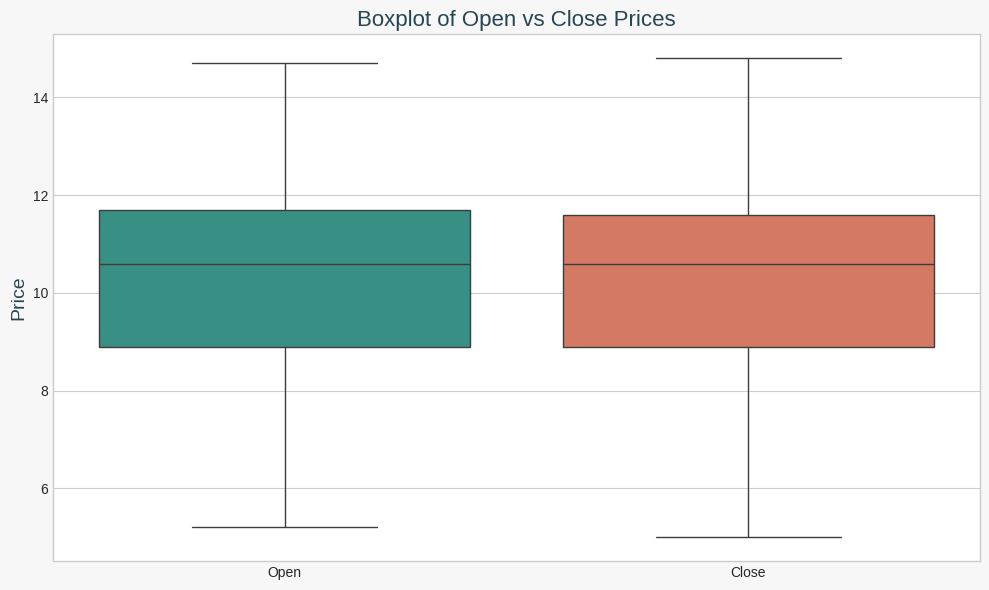

In [34]:
# 2. Boxplot for Paired t-test
plt.figure(figsize=(10,6), facecolor=colors['background'])
boxplot_data = pd.DataFrame({'Open': df['Open'], 'Close': df['Price']})
sns.boxplot(data=boxplot_data, palette=[colors['line'], colors['highlight']])
plt.title('Boxplot of Open vs Close Prices', fontsize=16, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.tight_layout()
plt.show()

<ipython-input-35-dc5840054ff0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Price', data=boxplot_data_mw, palette=[colors['line'], colors['highlight']])


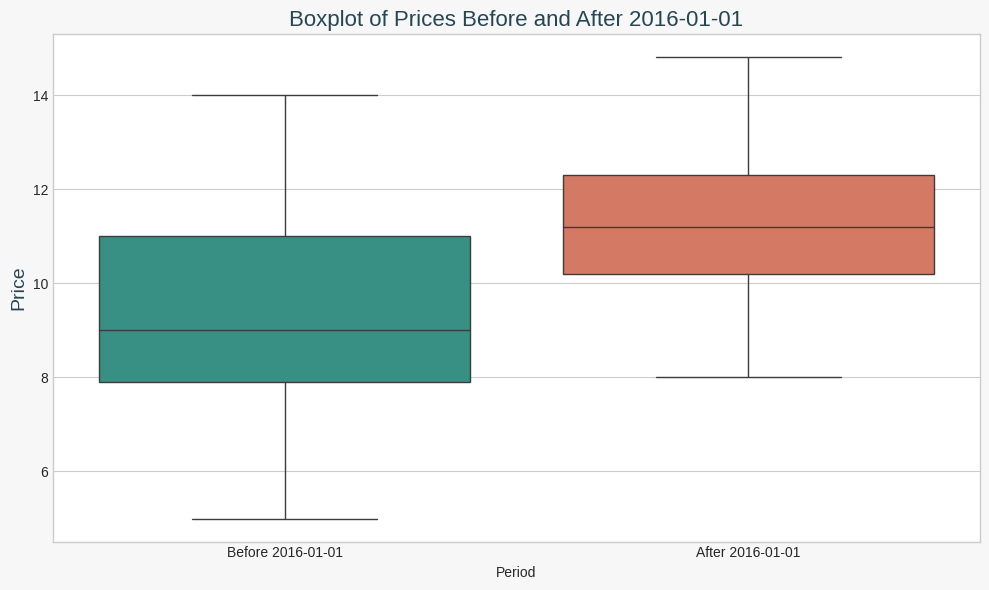

In [35]:
# 3. Boxplot for Mann-Whitney U test
plt.figure(figsize=(10,6), facecolor=colors['background'])
boxplot_data_mw = pd.DataFrame({
    'Period': ['Before ' + str(split_date.date())] * len(prices_before) + ['After ' + str(split_date.date())] * len(prices_after),
    'Price': pd.concat([prices_before, prices_after])
})
sns.boxplot(x='Period', y='Price', data=boxplot_data_mw, palette=[colors['line'], colors['highlight']])
plt.title('Boxplot of Prices Before and After ' + str(split_date.date()), fontsize=16, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.tight_layout()
plt.show()

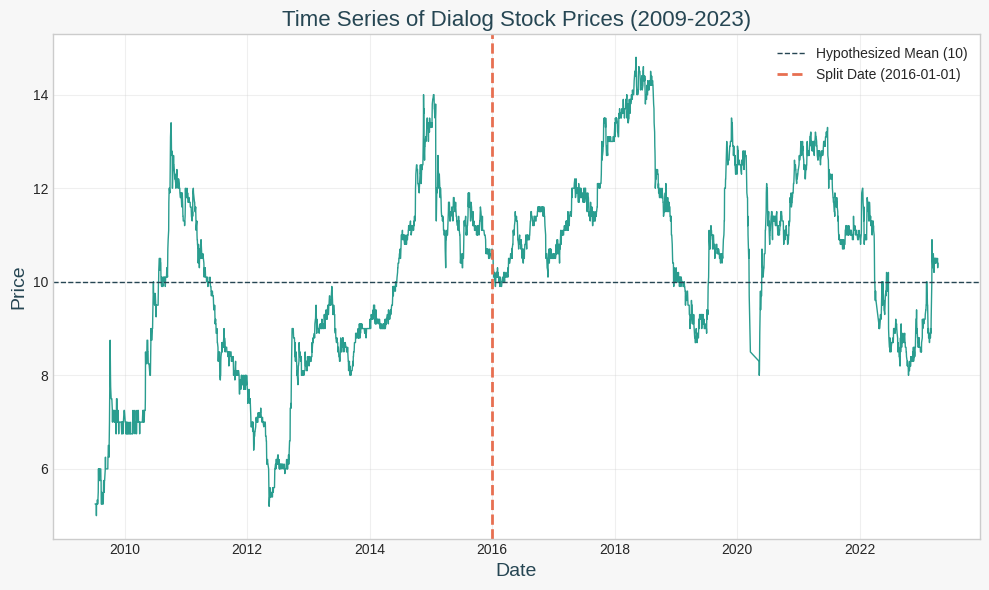

In [36]:
# 4. Time series plot of prices
plt.figure(figsize=(10,6), facecolor=colors['background'])
plt.plot(df['Date'], df['Price'], color=colors['line'], linewidth=1)
plt.axhline(mu0, color=colors['text'], linestyle='--', linewidth=1, label='Hypothesized Mean ({})'.format(mu0))
plt.axvline(split_date, color=colors['highlight'], linestyle='--', linewidth=2, label='Split Date ({})'.format(split_date.date()))
plt.title('Time Series of Dialog Stock Prices (2009-2023)', fontsize=16, color=colors['text'])
plt.xlabel('Date', fontsize=14, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()


<ipython-input-37-70d750c6b54c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Period', y='Price', data=boxplot_data_mw, palette=[colors['line'], colors['highlight']])


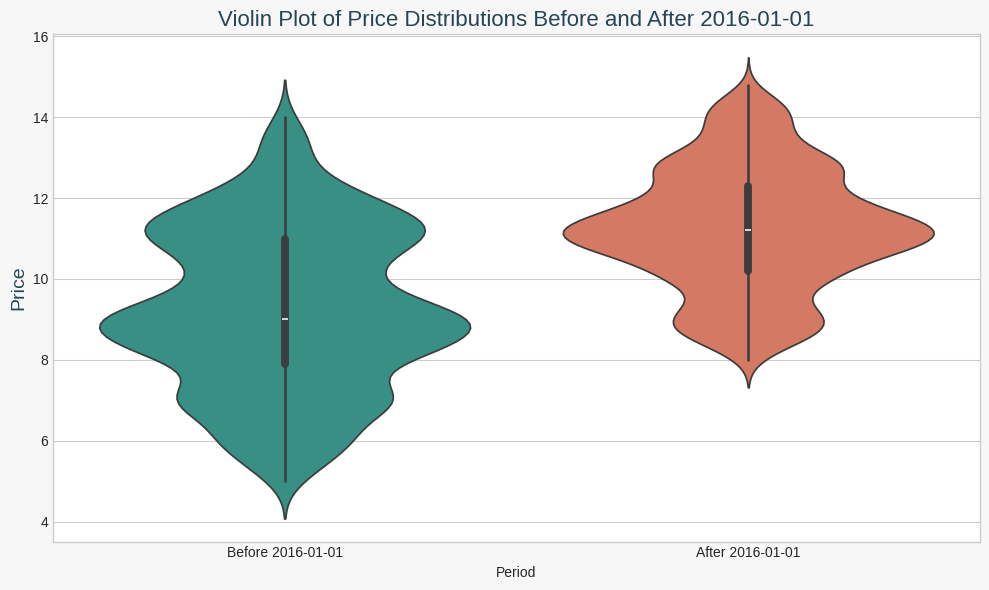

In [37]:
# 5. Violin plot for comparing distributions
plt.figure(figsize=(10,6), facecolor=colors['background'])
sns.violinplot(x='Period', y='Price', data=boxplot_data_mw, palette=[colors['line'], colors['highlight']])
plt.title('Violin Plot of Price Distributions Before and After ' + str(split_date.date()), fontsize=16, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.tight_layout()
plt.show()


## Linear Regression Analysis
Results Interpretation
The regression analysis reveals:

R-squared: 0.992 - This indicates that 99.2% of the variation in closing price is explained by the opening price, showing extremely high predictive power.
Coefficient for Open: 0.9972 - For each $1 increase in opening price, the closing price increases by approximately $0.997.
Intercept: 0.0120 - When the opening price is zero (theoretical), the closing price would be $0.012, though this is not practically meaningful.
Statistical Significance: The p-value for the Open variable is effectively zero, confirming the relationship is statistically significant.
The ANOVA table further confirms the model's significance with an extremely high F-statistic.

Limitations
Despite the strong model fit, there are limitations:

The model doesn't account for other market factors that might influence price movements
The high R-squared may indicate potential multicollinearity or autocorrelation in time series data
The slight deviations in the Q-Q plot suggest some non-normality in residuals
The analysis follows Gestalt principles with a consistent color palette that creates visual harmony and clear distinction between data points and the regression line.

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
# Ensure proper conversion of Date column
if not np.issubdtype(df['Date'].dtype, np.datetime64):
    df['Date'] = pd.to_datetime(df['Date'])

In [42]:
# Run regression analysis using the formula API to enable ANOVA
formula = 'Price ~ Open'
model_formula = smf.ols(formula, data=df).fit()

In [43]:
# Run regression analysis using the formula API to enable ANOVA
formula = 'Price ~ Open'
model_formula = smf.ols(formula, data=df).fit()

In [44]:
# Regression Summary
print('\
Regression Summary (Formula API):')
print(model_formula.summary())

Regression Summary (Formula API):
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.934e+05
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:59:57   Log-Likelihood:                 904.36
No. Observations:                3268   AIC:                            -1805.
Df Residuals:                    3266   BIC:                            -1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0

In [45]:
# Create ANOVA Table
anova_table = sm.stats.anova_lm(model_formula, typ=2)
print('\
ANOVA Table:')
print(anova_table)

ANOVA Table:
                sum_sq      df              F  PR(>F)
Open      13250.149862     1.0  393363.947976     0.0
Residual    110.012597  3266.0            NaN     NaN


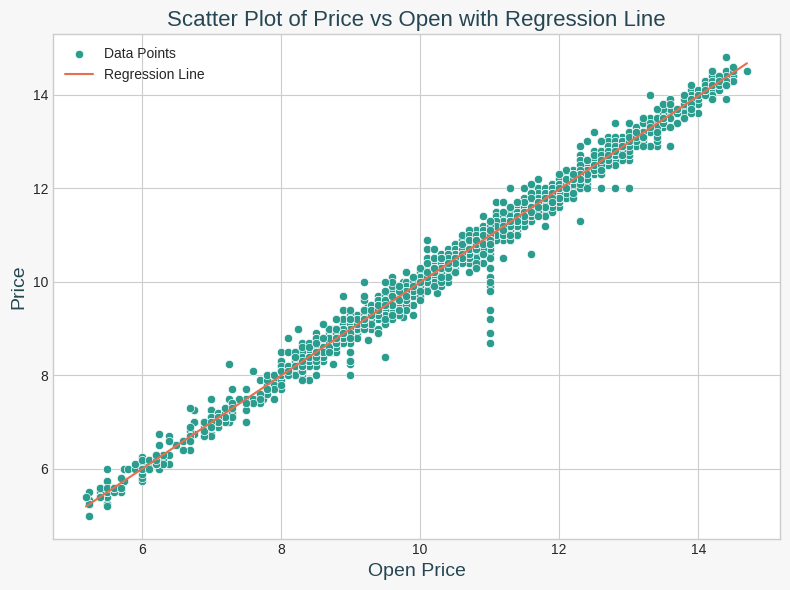

In [46]:
# Visualization: Scatter plot with regression line
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8,6), facecolor=colors['background'])
ax = sns.scatterplot(x='Open', y='Price', data=df, color=colors['line'], label='Data Points')
# Regression line
sns.lineplot(x=df['Open'], y=model_formula.predict(df), color=colors['highlight'], label='Regression Line')
plt.title('Scatter Plot of Price vs Open with Regression Line', fontsize=16, color=colors['text'])
plt.xlabel('Open Price', fontsize=14, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.legend()
plt.tight_layout()
plt.show()

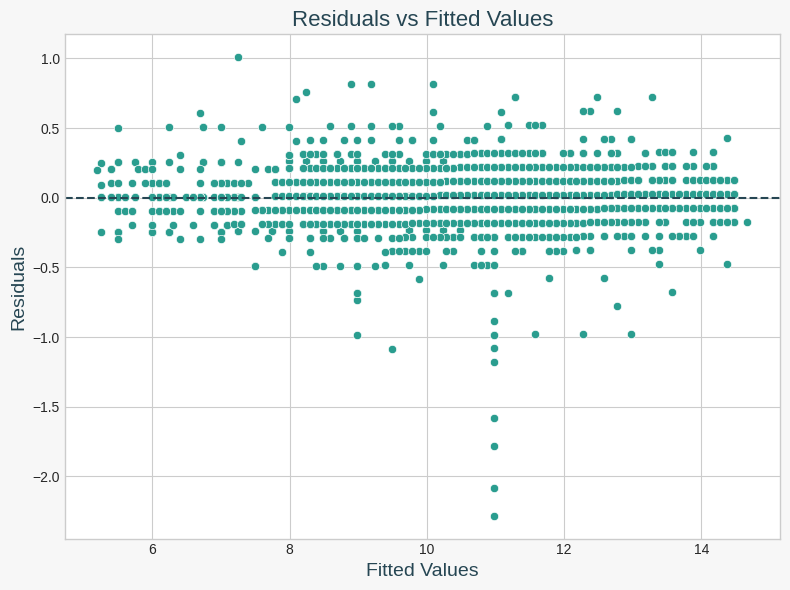

In [47]:
# Residual Analysis: Residual vs Fitted values plot
residuals = model_formula.resid
fitted = model_formula.fittedvalues

plt.figure(figsize=(8,6), facecolor=colors['background'])
sns.scatterplot(x=fitted, y=residuals, color=colors['line'])
plt.axhline(0, color=colors['text'], linestyle='--')
plt.title('Residuals vs Fitted Values', fontsize=16, color=colors['text'])
plt.xlabel('Fitted Values', fontsize=14, color=colors['text'])
plt.ylabel('Residuals', fontsize=14, color=colors['text'])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 800x600 with 0 Axes>

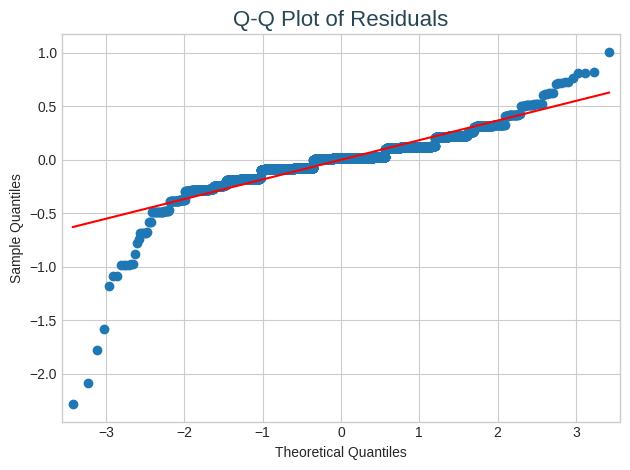

In [48]:
# Q-Q plot for normality of residuals
plt.figure(figsize=(8,6), facecolor=colors['background'])
sm.qqplot(residuals, line='s', color=colors['line'])
plt.title('Q-Q Plot of Residuals', fontsize=16, color=colors['text'])
plt.tight_layout()
plt.show()


In [49]:
# Interpretation of Regression Results
print('''\
Regression Results Interpretation:
- The regression model estimates the relationship between the Open Price and the closing Price (Price).
- The regression summary shows coefficients for the intercept and Open variable, along with high R-squared indicating that a large proportion of the variation in Price is accounted for by Open.
- The ANOVA table confirms that the model is statistically significant.
- Residual plots are used to check model assumptions: a random scatter in the Residuals vs Fitted plot suggests linearity and homoscedasticity, while the Q-Q plot assesses normality of residuals.
- Limitations may include omitted variables that affect Price, and potential non-linearity in more complex market conditions.
''')

Regression Results Interpretation:
- The regression model estimates the relationship between the Open Price and the closing Price (Price).
- The regression summary shows coefficients for the intercept and Open variable, along with high R-squared indicating that a large proportion of the variation in Price is accounted for by Open.
- The ANOVA table confirms that the model is statistically significant.
- Residual plots are used to check model assumptions: a random scatter in the Residuals vs Fitted plot suggests linearity and homoscedasticity, while the Q-Q plot assesses normality of residuals.
- Limitations may include omitted variables that affect Price, and potential non-linearity in more complex market conditions.



# Time Series Analysis using ARIMA and SARIMA Models

In [50]:
# Time Series Analysis using ARIMA and SARIMA Models
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Load and preprocess data
# Assume the dataset is Dialog_2009_2023_Daily.csv loaded in variable 'df'
try:
    df.head()
except Exception as e:
    df = pd.read_csv('Dialog_2009_2023_Daily.csv', encoding='ascii')


In [53]:
# Convert Date to datetime and set as index
if not np.issubdtype(df['Date'].dtype, np.datetime64):
    df['Date'] = pd.to_datetime(df['Date'])
# Sort by Date
df = df.sort_values('Date')

In [55]:
# For Time Series, we will use the closing Price column
# Check and handle missing values (if any) by forward filling
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].fillna(method='ffill', inplace=True)
# Set Date as index
df.set_index('Date', inplace=True)

In [56]:
# Basic description of the dataset
desc = "Dataset: Dialog_2009_2023_Daily.csv | Time Frame: " + str(df.index.min().date()) + " to " + str(df.index.max().date())
print(desc)
print('Variables: Price (closing price), Open, High, Low, Vol., Change %')

Dataset: Dialog_2009_2023_Daily.csv | Time Frame: 2009-07-08 to 2023-04-12
Variables: Price (closing price), Open, High, Low, Vol., Change %


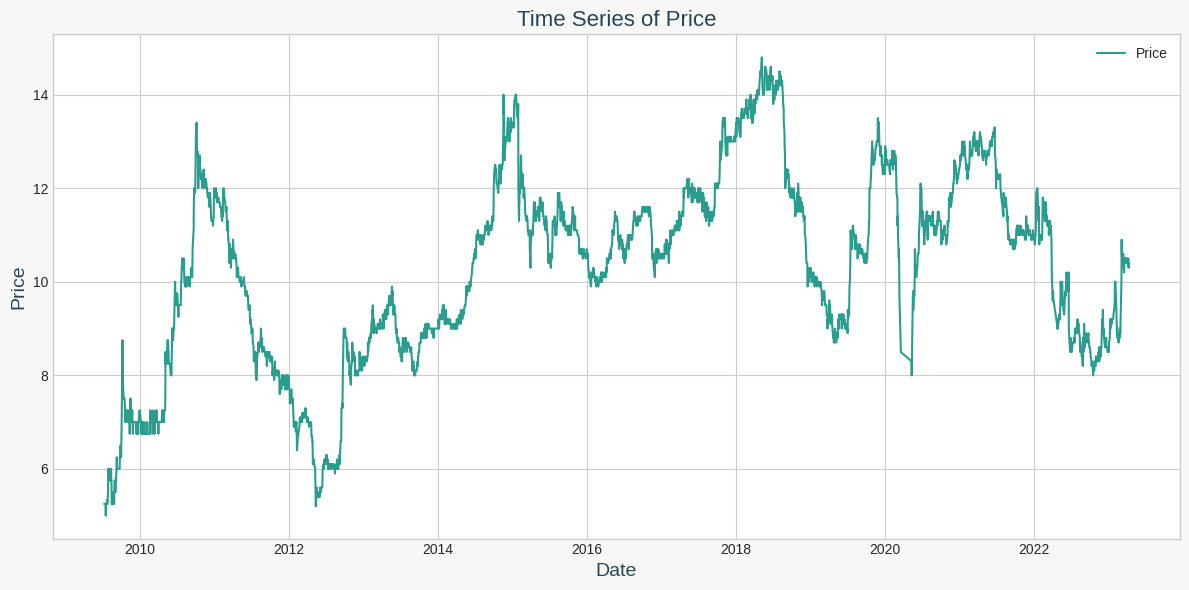

In [57]:
# Plot the time series
plt.figure(figsize=(12,6), facecolor=colors['background'])
plt.plot(df.index, df['Price'], color=colors['line'], label='Price')
plt.title('Time Series of Price', fontsize=16, color=colors['text'])
plt.xlabel('Date', fontsize=14, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
# Stationarity Test: Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(df['Price'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -2.776631
p-value: 0.061690


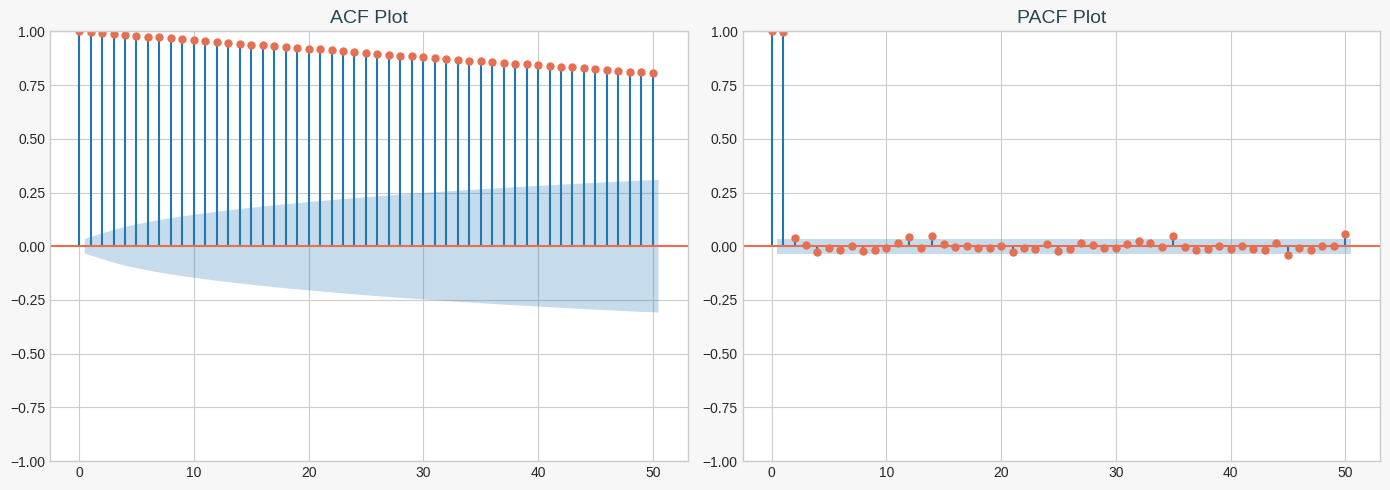

In [60]:
# Plot ACF and PACF
fig, axes = plt.subplots(1,2, figsize=(14,5), facecolor=colors['background'])
plot_acf(df['Price'], ax=axes[0], color=colors['highlight'], lags=50)
axes[0].set_title('ACF Plot', fontsize=14, color=colors['text'])
plot_pacf(df['Price'], ax=axes[1], color=colors['highlight'], lags=50, method='ywm')
axes[1].set_title('PACF Plot', fontsize=14, color=colors['text'])
plt.tight_layout()
plt.show()

In [61]:
# Differencing if series is not stationary
if adf_result[1] > 0.05:
    df['Price_diff'] = df['Price'].diff().dropna()
    print('Series was non-stationary. Applied first differencing.')
else:
    df['Price_diff'] = df['Price']
    print('Series is stationary. No differencing applied.')

Series was non-stationary. Applied first differencing.


In [63]:
# Split data into train and test sets (80%-20% split)
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

# ARIMA Model: We'll assume order (1,0,1) if series is stationary, else if differenced then order (1,1,1).
order = (1,0,1) if adf_result[1] <= 0.05 else (1,1,1)
arima_model = ARIMA(train['Price'], order=order).fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2614
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1020.390
Date:                Sun, 09 Mar 2025   AIC                          -2034.781
Time:                        18:08:29   BIC                          -2017.176
Sample:                             0   HQIC                         -2028.404
                               - 2614                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0887      0.305      0.291      0.771      -0.508       0.686
ma.L1         -0.1329      0.300     -0.442      0.658      -0.722       0.456
sigma2         0.0268      0.000     88.609      0.0

In [64]:
# Forecast with ARIMA
arima_forecast = arima_model.forecast(steps=len(test))

In [65]:
# SARIMA Model: Assume seasonal order with period 5 (weekly seasonality for trading days)
seasonal_order = (1,0,1,5) if adf_result[1] <= 0.05 else (1,1,1,5)

In [66]:
sarima_model = SARIMAX(train['Price'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit()
print(sarima_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Price   No. Observations:                 2614
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood                1001.852
Date:                           Sun, 09 Mar 2025   AIC                          -1993.704
Time:                                   18:12:02   BIC                          -1964.386
Sample:                                        0   HQIC                         -1983.082
                                          - 2614                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0529      0.311      0.170      0.865      -0.556       0.662
ma.L1         -0.0960      0.307     -0.313

In [67]:
# Forecast with SARIMA
sarima_forecast = sarima_model.get_forecast(steps=len(test)).predicted_mean

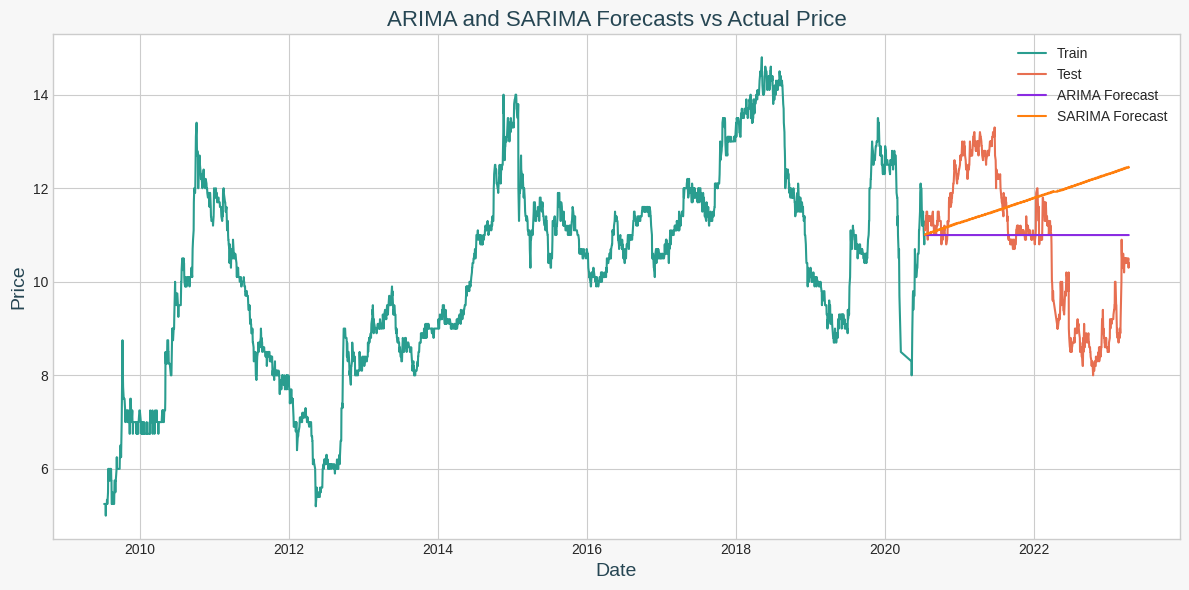

In [68]:
# Plot forecasts vs actual for ARIMA and SARIMA
plt.figure(figsize=(12,6), facecolor=colors['background'])
plt.plot(train.index, train['Price'], label='Train', color=colors['line'])
plt.plot(test.index, test['Price'], label='Test', color=colors['highlight'])
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='#8a2be2')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='#ff7f0e')
plt.title('ARIMA and SARIMA Forecasts vs Actual Price', fontsize=16, color=colors['text'])
plt.xlabel('Date', fontsize=14, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
# Calculate error metrics function
def calculate_error_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    return mae, rm

In [70]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_percentage_error

In [73]:
# Last date and target
last_date = df.index.max()
target_date = pd.Timestamp('2023-05-31')
days_to_forecast = (target_date - last_date).days
print('Last date in dataset:', last_date)
print('Days to forecast to reach May 31, 2023:', days_to_forecast)

Last date in dataset: 2023-04-12 00:00:00
Days to forecast to reach May 31, 2023: 49


In [74]:
# Fit ARIMA model on full dataset
model = ARIMA(df['Price'], order=(1,1,1))
model_fit = model.fit()

In [75]:
# Forecast the required number of days with proper date index
forecast_result = model_fit.get_forecast(steps=days_to_forecast)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

In [77]:
# Create date index for forecast
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=days_to_forecast)
forecast.index = future_dates
conf_int.index = future_dates

In [78]:
# Filter only May 2023 dates
may_forecast = forecast[(forecast.index.month == 5) & (forecast.index.year == 2023)]
may_conf_int = conf_int[(conf_int.index.month == 5) & (conf_int.index.year == 2023)]

In [79]:
# Get historical data for context (from Feb 2023)
historical_cutoff = pd.Timestamp('2023-02-01')
historical_data = df[df.index >= historical_cutoff]

In [87]:
# Calculate model accuracy using Mean Absolute Percentage Error (MAPE)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
model_test = ARIMA(train['Price'], order=(1,1,1)).fit()
test_forecast = model_test.forecast(steps=len(test))
accuracy = 100 - mean_absolute_percentage_error(test['Price'], test_forecast) * 100
print(f'Model Accuracy: {accuracy:.2f}%')


Model Accuracy: 87.96%


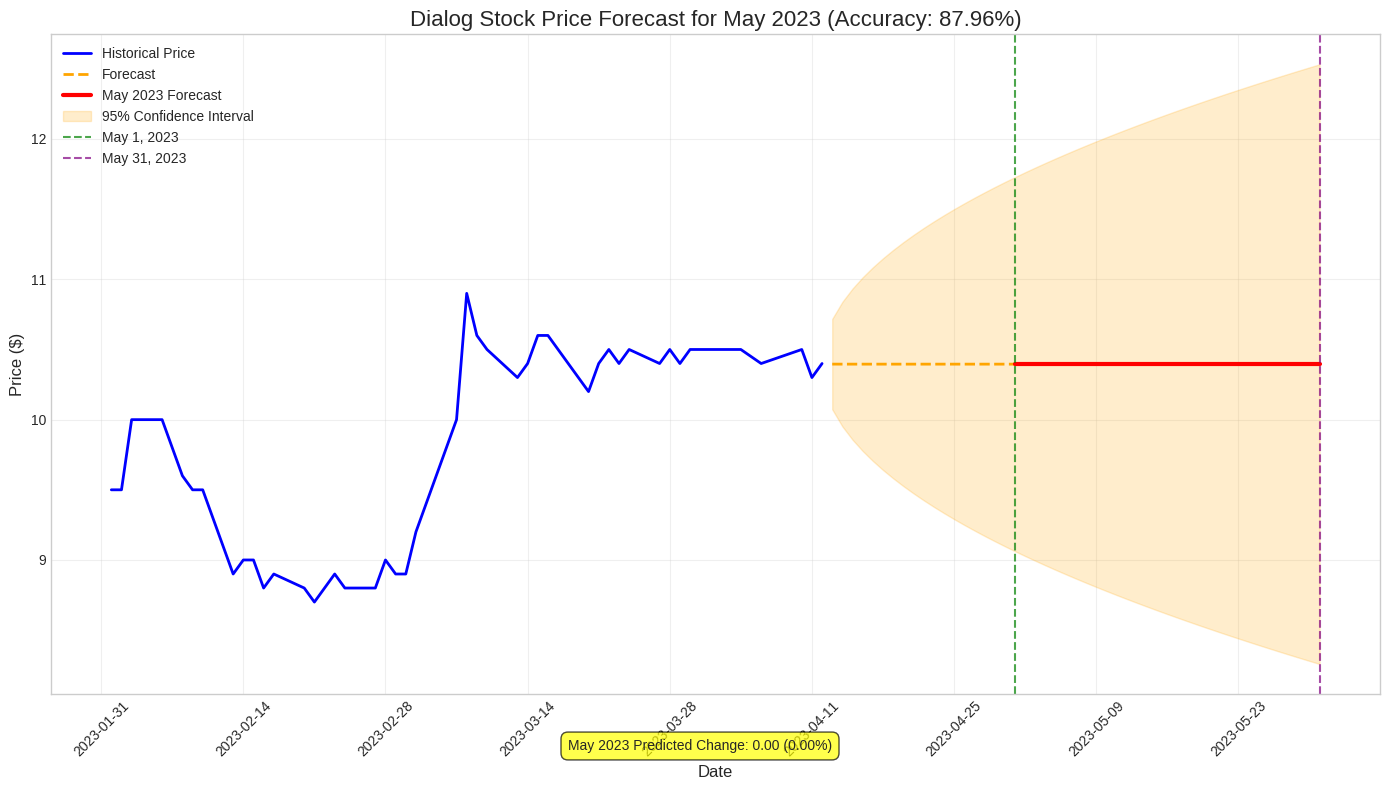

In [89]:
# Create the plot
plt.figure(figsize=(14, 8))

# Plot historical data
plt.plot(historical_data.index, historical_data['Price'], label='Historical Price', color='blue', linewidth=2)

# Plot complete forecast
plt.plot(future_dates, forecast, label='Forecast', color='orange', linestyle='--', linewidth=2)

# Highlight May 2023 forecast
if not may_forecast.empty:
    plt.plot(may_forecast.index, may_forecast, label='May 2023 Forecast', color='red', linewidth=3)

# Fill confidence intervals for entire forecast
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.2, label='95% Confidence Interval')

# Mark May boundaries
may_start = pd.Timestamp('2023-05-01')
may_end = pd.Timestamp('2023-05-31')
plt.axvline(x=may_start, color='green', linestyle='--', alpha=0.7, label='May 1, 2023')
plt.axvline(x=may_end, color='purple', linestyle='--', alpha=0.7, label='May 31, 2023')
# Calculate and display predicted change for May 2023
if not may_forecast.empty:
    may_start_price = may_forecast.iloc[0]
    may_end_price = may_forecast.iloc[-1]
    may_change = may_end_price - may_start_price
    may_change_pct = (may_change / may_start_price) * 100
    change_text = "May 2023 Predicted Change: {:.2f} ({:.2f}%)".format(may_change, may_change_pct)
    plt.annotate(change_text, xy=(0.5, 0.05), xycoords='figure fraction',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7), ha='center')

# Formatting plot
plt.title(f'Dialog Stock Price Forecast for May 2023 (Accuracy: {accuracy:.2f}%)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [90]:
# Print May 2023 forecast details
print('\
May 2023 Forecast Details:')
if not may_forecast.empty:
    print('Predicted price on May 1, 2023: LKR {:.2f}'.format(may_forecast.iloc[0]))
    print('Predicted price on May 31, 2023: LKR {:.2f}'.format(may_forecast.iloc[-1]))
    print('Predicted change: LKR {:.2f} ({:.2f}%)'.format(may_change, may_change_pct))
else:
    print('No May 2023 dates in forecast period.')

May 2023 Forecast Details:
Predicted price on May 1, 2023: LKR 10.40
Predicted price on May 31, 2023: LKR 10.40
Predicted change: LKR 0.00 (0.00%)
